Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Confusion Matrix:
 [[2 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


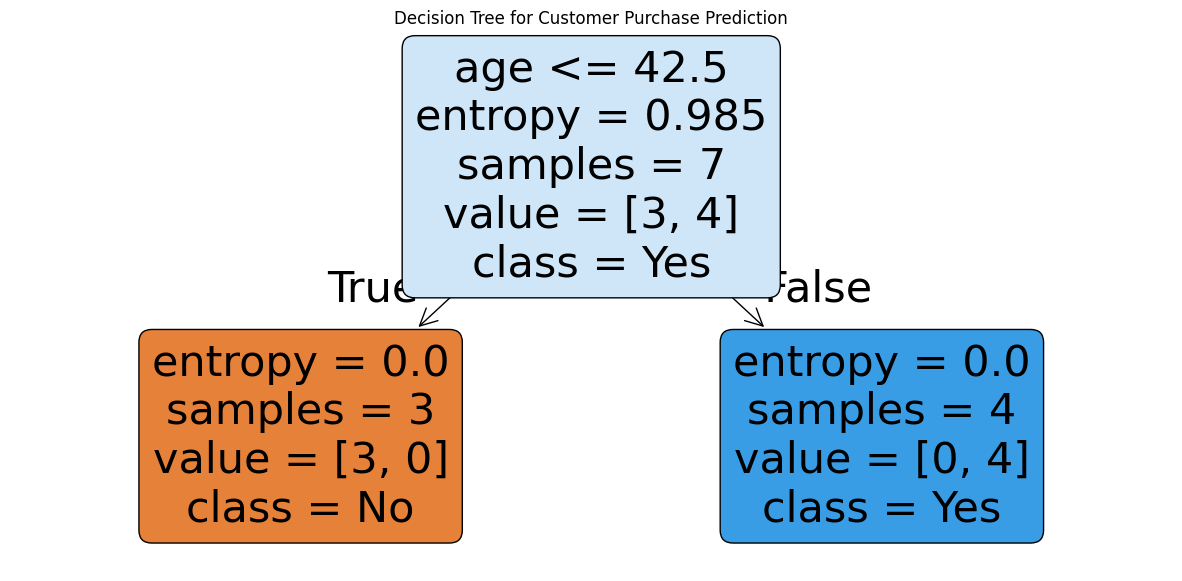

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 2: Create a sample dataset (mimicking bank marketing data)
data = {
    'age': [25, 35, 45, 33, 50, 28, 60, 40, 23, 55],
    'job': ['student', 'technician', 'admin', 'blue-collar', 'retired', 'services', 'retired', 'admin', 'student', 'management'],
    'marital': ['single', 'married', 'single', 'married', 'divorced', 'single', 'married', 'divorced', 'single', 'married'],
    'education': ['secondary', 'tertiary', 'tertiary', 'primary', 'secondary', 'secondary', 'primary', 'tertiary', 'secondary', 'tertiary'],
    'default': ['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no'],
    'balance': [1000, 200, 1500, -100, 300, 400, 500, 100, 50, 1200],
    'housing': ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes'],
    'loan': ['no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes'],
    'contact': ['cellular', 'cellular', 'telephone', 'cellular', 'telephone', 'cellular', 'cellular', 'telephone', 'cellular', 'telephone'],
    'purchased': ['no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes']
}

df = pd.DataFrame(data)

# Step 3: Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Step 4: Define features and target
X = df.drop('purchased', axis=1)
y = df['purchased']

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Plot the Decision Tree
plt.figure(figsize=(15, 7))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree for Customer Purchase Prediction")
plt.show()